In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split


In [29]:
ds_iris = pd.read_csv("/home/piai/Desktop/POSCO_Ai-BigData_academy/Week2_BigData/실습파일/IRIS.csv", engine = 'python')
ds_iris_x = ds_iris.drop("SPECIES", axis =1)
ds_iris_y = ds_iris["SPECIES"]
ds_iris_x.head()

,SEPAL_LENGTH,SEPAL_WIDTH,PETAL_LENGTH,PETAL_WIDTH
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [30]:
from sklearn.model_selection import train_test_split

ds_iris_train_x, ds_iris_test_x, ds_iris_train_y, ds_iris_test_y =\
train_test_split(ds_iris_x, ds_iris_y, test_size=0.30, random_state = 1234)
print("train data X size:{}".format(ds_iris_train_x.shape))
print("train data Y size:{}".format(ds_iris_train_y.shape))
print("test data X size:{}".format(ds_iris_test_x.shape))
print("test data Y size:{}".format(ds_iris_test_y.shape))

train data X size:(105, 4)
train data Y size:(105,)
test data X size:(45, 4)
test data Y size:(45,)


In [32]:
# 최대 이웃수
max_neibor = 5
para_neibor = [i for i in range(1,6)]

train_accuracy = []; test_accuracy = [];

for n_neibors in para_neibor:
    clf = KNeighborsClassifier(n_neighbors=n_neibors)
    clf.fit(ds_iris_train_x,ds_iris_train_y)
    train_accuracy.append(clf.score(ds_iris_train_x,ds_iris_train_y))
    test_accuracy.append(clf.score(ds_iris_test_x,ds_iris_test_y))
    
df_neibors = pd.DataFrame()
df_neibors["Neighbors"] = para_neibor
df_neibors["TrainAccuracy"] = train_accuracy
df_neibors["TestAccuracy"] = test_accuracy
df_neibors

,Neighbors,TrainAccuracy,TestAccuracy
0,1,1.000000,0.977778
1,2,0.971429,0.977778
2,3,0.961905,0.977778
3,4,0.952381,0.955556
4,5,0.971429,1.000000


In [15]:
from sklearn.tree import DecisionTreeClassifier
train_accuracy = []
test_accuracy  = []

para_criterion = ["gini", "entropy"]

for criterion in para_criterion:
    tree1 = DecisionTreeClassifier(criterion= criterion,max_depth=4, min_samples_leaf= 5, min_samples_split = 10
                                   ,random_state=1234)
    tree1.fit(ds_iris_train_x, ds_iris_train_y)
    train_accuracy.append(tree1.score(ds_iris_train_x, ds_iris_train_y))
    test_accuracy.append(tree1.score(ds_iris_test_x, ds_iris_test_y))
    
ds_accuracy1 = pd.DataFrame()
ds_accuracy1["Criterion"] = para_criterion
ds_accuracy1["TrainAccuracy"] = train_accuracy
ds_accuracy1["TestAccuracy"] = test_accuracy
ds_accuracy1.round(3)

,Criterion,TrainAccuracy,TestAccuracy
0,gini,0.962,0.956
1,entropy,0.962,0.956


In [24]:
ds_iris_x

,SEPAL_LENGTH,SEPAL_WIDTH,PETAL_LENGTH,PETAL_WIDTH
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from scipy import stats
from sklearn.preprocessing import StandardScaler

In [17]:
ds_health = pd.read_csv("/home/piai/Desktop/POSCO_Ai-BigData_academy/Week2_BigData/실습파일/체질검사.csv", engine = 'python')
ds_health.head()

,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
0,35.2,46,363.15,72.25,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4
1,11.8,27,168.00,71.25,38.1,93.0,79.1,94.5,57.3,36.2,24.5,29.0,30.0,18.8
2,22.2,69,177.75,68.50,38.7,102.0,95.0,98.3,55.0,38.3,21.8,30.8,25.7,18.8
3,10.6,57,147.75,65.75,35.2,99.6,86.4,90.1,53.0,35.0,21.3,31.7,27.3,16.9
4,47.5,51,219.00,64.00,41.2,119.8,122.1,112.8,62.5,36.9,23.6,34.7,29.1,18.4


In [18]:
ds_health_y = ds_health["FAT"]
ds_health_x = ds_health.drop("FAT", axis = 1, inplace = False)

print("목표변수 데이터 크기: {}".format(ds_health_y.shape))
print("설명변수 데이터 크기: {}".format(ds_health_x.shape))

목표변수 데이터 크기: (252,)
설명변수 데이터 크기: (252, 13)


In [19]:
scaler = StandardScaler()
ds_health_x_scaled = scaler.fit_transform(ds_health_x)

print("Scaled Data :\n{}".format(ds_health_x_scaled[:5].round(3)))
print("Shape :\n{}".format(ds_health_x_scaled.shape))

Scaled Data :
[[ 0.089  6.281  0.575  5.444  4.205  5.161  6.685  5.324  4.366  3.841
   4.221  0.167  3.403]
 [-1.422 -0.372  0.301  0.044 -0.93  -1.25  -0.756 -0.402 -0.993  0.826
  -1.086  0.663  0.612]
 [ 1.917 -0.04  -0.451  0.292  0.14   0.227 -0.224 -0.841 -0.121 -0.77
  -0.489 -1.47   0.612]
 [ 0.963 -1.063 -1.203 -1.151 -0.146 -0.572 -1.371 -1.223 -1.492 -1.066
  -0.19  -0.676 -1.427]
 [ 0.486  1.366 -1.682  1.322  2.255  2.745  1.804  0.591 -0.702  0.294
   0.805  0.216  0.183]]
Shape :
(252, 13)


In [20]:
pca = PCA(n_components = 13)
x_pca = pca.fit_transform(ds_health_x_scaled)

print("PCA Data : \n{}".format(x_pca[:5]))
print("Shape : \n{}".format(x_pca.shape))

ds_x_pca = pd.DataFrame(x_pca, columns=["Prin1","Prin2","Prin3","Prin4","Prin5","Prin6","Prin7","Prin8"
                                        ,"Prin9","Prin10","Prin11","Prin12","Prin13" ])

PCA Data : 
[[ 1.51407865e+01  7.49180061e-01  1.73038829e+00  2.97562799e+00
  -1.20140416e+00  1.91649244e+00 -5.65465823e-01  6.41639529e-01
  -7.16668464e-01  6.67288487e-01  1.11830608e+00 -3.74402932e-01
  -4.01646380e-01]
 [-1.25745311e+00 -1.79805793e+00 -6.03591475e-01 -4.05941404e-01
   1.33324667e+00  8.22236818e-01  1.74463381e-01 -1.01801483e+00
   3.69261273e-02  3.76706308e-01 -8.75860804e-02 -1.14957740e-01
  -2.18982014e-01]
 [-7.27442052e-01  2.31886158e+00 -8.92096811e-01  6.82580352e-01
  -5.03280467e-01  6.00209382e-01 -5.16400793e-01 -9.56416513e-03
   4.79435580e-02 -2.64350345e-01  1.76015189e-01 -7.71764507e-02
  -1.35788495e-01]
 [-3.21015592e+00  1.46511228e+00  4.57907542e-01 -5.75637151e-01
   1.97721197e-02 -1.78803322e-01  7.16879046e-01  8.43042247e-01
   2.18223478e-01 -2.55255904e-01 -2.38793622e-01 -1.00886784e-01
  -1.22172296e-01]
 [ 3.24650172e+00  2.29304235e+00  1.82833929e+00 -2.33659425e-02
  -4.06978793e-01  1.14656798e+00  1.70117486e+00 -1.0

In [21]:
ds_pca = pd.DataFrame()
ds_pca["Prin"] = [ i for i in range(1, 14)]
ds_pca["EigenValues"] = pca.explained_variance_
ds_pca["EigenValueRatio"] = pca.explained_variance_ratio_
ds_pca["CumsumEigenValueRatio"] = np.cumsum(pca.explained_variance_ratio_)
ds_pca.round(3)

,Prin,EigenValues,EigenValueRatio,CumsumEigenValueRatio
0,1,8.072,0.618,0.618
1,2,1.360,0.104,0.723
2,3,1.006,0.077,0.800
3,4,0.670,0.051,0.851
4,5,0.601,0.046,0.897
5,6,0.315,0.024,0.921
6,7,0.287,0.022,0.943
7,8,0.262,0.020,0.963
8,9,0.184,0.014,0.978
9,10,0.135,0.010,0.988


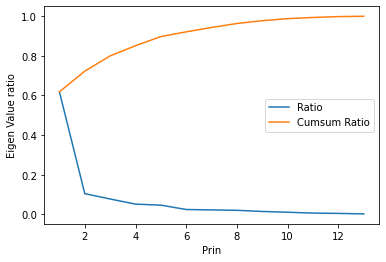

In [22]:
plt.plot(ds_pca["Prin"], ds_pca["EigenValueRatio"], label = "Ratio")

plt.plot(ds_pca["Prin"], ds_pca["CumsumEigenValueRatio"], label = "Cumsum Ratio")

plt.ylabel("Eigen Value ratio")
plt.xlabel("Prin")
plt.legend(loc="best")

In [23]:
from sklearn.preprocessing import scale, robust_scale, minmax_scale

In [13]:
dt =pd.DataFrame()
dt["x"] = [10,4,7,1]
dt

,x
0,10
1,4
2,7
3,1


In [14]:
minmax_scale(dt)

array([[1.        ],
       [0.33333333],
       [0.66666667],
       [0.        ]])